In [43]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (20.0, 10.0)
plt.style.use('ggplot')
import numpy as np

import scipy.stats

In [2]:
CAREER_LENGTH = 15

In [3]:
credible_authors = pd.read_csv('./derived-data/authors-scientific-atleast-'+str(CAREER_LENGTH)+'-year-extended.csv')
#credible_authors = pd.read_csv('derived-data/authors-scientific-atleast-'+ str(CAREER_LENGTH) + '-year-extended.csv', encoding='utf-8')

In [4]:
credible_authors = credible_authors.set_index('author')

In [5]:
credible_authors.head()

,start_year,end_year,total_num_pub,career_length,max_absence-0-15,avg_absence-0-15,dropped_after_10,gender,early_career_qual,early_career_recognition,succ_after_15y,early_career_prod
author,,,,,,,,,,,,
'maseka lesaoana,2001,2015,2,15,14,7.500000,True,none,23.0,5.0,23.0,1
a min tjoa,1979,2017,191,39,7,1.000000,False,none,0.0,0.0,2.0,1
a-imam al-sammak,1992,2006,3,15,13,5.000000,True,m,0.0,0.0,0.0,1
a-xing zhu,1998,2017,22,20,5,1.153846,False,none,0.0,0.0,38.0,1
a. a. (louis) beex,1980,2016,31,37,6,1.666667,False,m,0.0,0.0,4.0,2


In [ ]:
## People with high success have 0 quality?

In [47]:
credible_authors.sort_values(by='succ_after_15y', ascending=False).head(50)[['start_year', 'end_year', 'early_career_qual', 'early_career_prod', 'succ_after_15y']]

,start_year,end_year,early_career_qual,early_career_prod,succ_after_15y
author,,,,,
shuicheng yan,2002,2017,406.0,16,13580.0
adrian perrig,2000,2017,4237.0,15,12381.0
jeffrey g. andrews,2001,2017,168.0,6,12309.0
jure leskovec,2003,2017,963.0,6,11949.0
emmanuel j. candès,2001,2017,736.0,6,11653.0
ion stoica,1995,2017,189.0,9,11277.0
samuel madden,2000,2017,2348.0,8,10888.0
hari balakrishnan,1993,2017,329.0,4,10698.0
jian pei,2000,2017,4016.0,21,9357.0


In [6]:
years = credible_authors.start_year.unique()

In [7]:
  
# we code authors as +1 if they are better than 90% of other authors, as -1 if they are with worst 25% and 0 otherwise  
def code_successful(x, percentile_25, percentile_90):
    if (x <= percentile_25):
        return -1
    elif (x > percentile_90):
        return 1
    else:
        return 0
        
for year in years:
    temp = credible_authors[credible_authors.start_year == year]
    medi = temp.succ_after_15y.median()
    percentile_25 = np.nanpercentile(temp.succ_after_15y.values, 25, interpolation ="nearest")
   
    #same as median
    percentile_50 = np.nanpercentile(temp.succ_after_15y.values, 50, interpolation ="nearest")
    
    percentile_90 = np.nanpercentile(temp.succ_after_15y.values, 90, interpolation ="nearest")
 
    credible_authors.loc[credible_authors.start_year == year, 'successful'] = credible_authors.loc[
        credible_authors.start_year == year, 'succ_after_15y'].apply(lambda x: code_successful(x, percentile_25, percentile_90))
    
 

### We only have 7 authors in cohort 2004 that have 15 or more years career age??? How is that possible?

In [8]:
#print(credible_authors.head())

print(credible_authors["start_year"].value_counts())

#succ_scientists = credible_authors[credible_authors.successful == 1]
#print(succ_scientists["start_year"].value_counts())
#medium_scientists = credible_authors[credible_authors.successful == 0]
#print(medium_scientists["start_year"].value_counts())
#unsucc_scientists = credible_authors[credible_authors.successful == -1]
#print(unsucc_scientists["start_year"].value_counts())

2000    9636
2001    9365
1999    8875
1998    8562
2002    8229
1997    7778
1996    7304
1994    6962
1995    6866
1993    6453
1992    5542
1991    5003
2003    4883
1990    4430
1989    3791
1988    3463
1987    2787
1986    2510
1985    2127
1984    2053
1983    1669
1982    1452
1981    1263
1980    1114
1979    1057
1977     899
1978     864
1976     811
1974     705
1975     690
1973     652
1972     483
1971     417
1970     320
2004       7
Name: start_year, dtype: int64


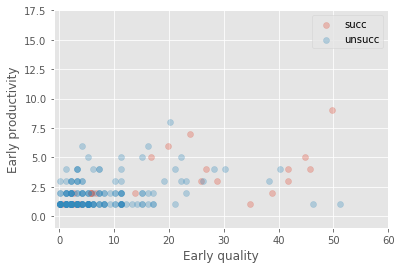

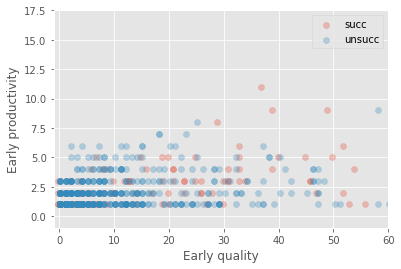

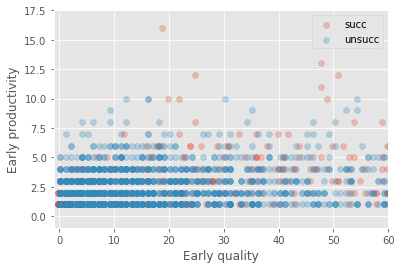

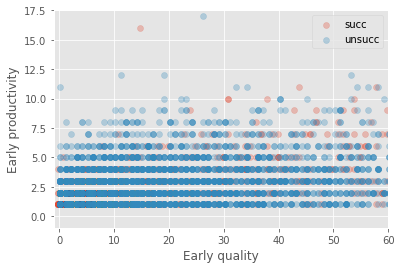

In [11]:

years = [1970, 1980, 1990, 1999]

for y in years:
    credible_test = credible_authors[credible_authors["start_year"] == y]
    colors = credible_test.successful.apply(lambda x: 'black' if x==1 else 'white')
    plt.scatter(credible_test[credible_test.successful == 1].early_career_qual - 0.2, 
                credible_test[credible_test.successful == 1].early_career_prod, label='succ', alpha=0.3) #, color=colors)
    plt.scatter(credible_test[credible_test.successful == 0].early_career_qual + 0.2, 
                credible_test[credible_test.successful == 0].early_career_prod, label='unsucc', alpha=0.3) #, color=colors)
    plt.xlabel('Early quality')
    plt.ylabel('Early productivity')
    plt.ylim((-1,17.5))
    plt.xlim((-1,60))
    plt.legend()
    plt.show()

## Do women/men that produce high quality work become successful later? 
## Do men women have the same probability of becomming successful if they produce early work of similar quality?
## Is early career quality predictive for later success?

Its looks like early career quality is not very predictive for later success. Its explains ~50% of variation. 
We need to find a better model here. e.g. early career quality normalized by productivity or degree.


If we only look at th top 10% of scientists (i.e. the ones that are most successful after 15 years) we still find that most of them had low early career quality.


                  start_year  end_year  total_num_pub  career_length  \
author                                                                 
'maseka lesaoana        2001      2015              2             15   

                  max_absence-0-15  avg_absence-0-15  dropped_after_10 gender  \
author                                                                          
'maseka lesaoana                14               7.5              True   none   

                  early_career_qual  early_career_recognition  succ_after_15y  \
author                                                                          
'maseka lesaoana               23.0                       5.0            23.0   

                  early_career_prod  successful  
author                                           
'maseka lesaoana                  1         0.0  


/home/danielkostic/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/danielkostic/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/danielkostic/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)
/home/danielkostic/anaconda3/lib/python3.6/sit

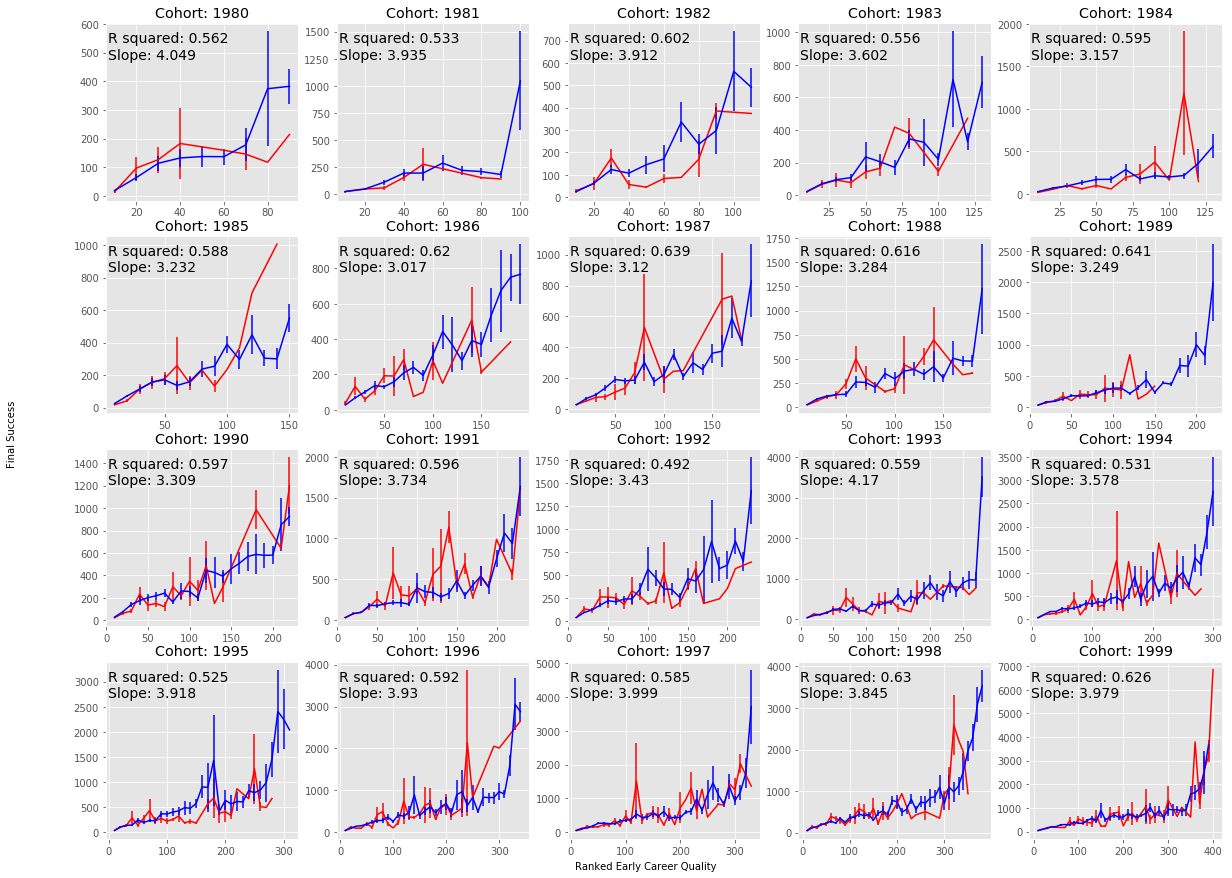

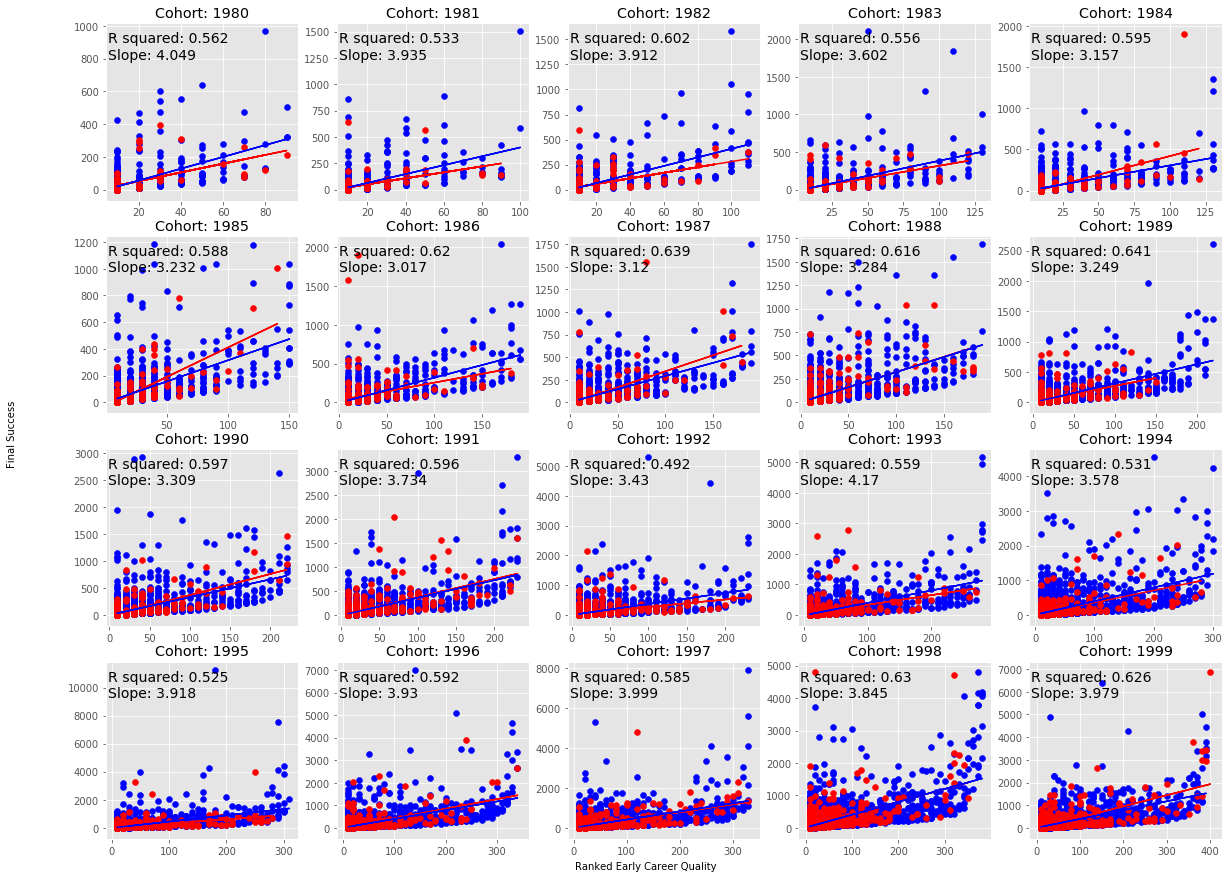

   year num_obs  group     slope  intercept   r_value       p_value   std_err
0  1980    1114    all  4.049310 -22.725969  0.561893  1.040179e-93  0.178769
1  1980     643    men  3.607889 -16.586596  0.562327  6.908095e-55  0.209554
2  1980      87  women  2.669788  -1.576674  0.562363  1.441468e-08  0.425793
3  1981    1263    all  3.934727 -17.581781  0.533054  1.231020e-93  0.175872
4  1981     724    men  4.211362 -20.018647  0.548203  4.948993e-58  0.239110


In [16]:
from matplotlib.lines import Line2D
from scipy.stats import stats
import math
import matplotlib.pyplot as plt


zscore = False
rank=True
average_qual = False

numcols = 5
start_range = 1980
end_range = 2000
cells = end_range - start_range
numrows = int(cells/numcols)

round_to = 10

var = "qual" # can  be qual or prod 

results = pd.DataFrame(columns=["year", "num_obs", "group", "slope", "intercept", "r_value", "p_value", "std_err"])
fig, ax = plt.subplots(nrows=numrows, ncols=numcols, sharex=False, sharey=False, figsize=(20,15))
fig2, ax2 = plt.subplots(nrows=numrows, ncols=numcols, sharex=False, sharey=False, figsize=(20,15))


custom_lines = [Line2D([0], [0], color='red', lw=4),
                Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='black', lw=4)]


print(credible_authors.head(n=1))

for year in range(start_range, end_range):
    data = credible_authors[credible_authors.start_year == year]
    
    # only look at the medium people, the worst 25% and the top 10% are ignored
    #data = data[data.successful == 0]
    
    #only look at top 10%
    #data = data[data.successful == 1]
    
    
   
    #TOCO: HACK
    #TEST: what if we look at average quality of early career work or max quality?
    if(average_qual):
        data['early_career_qual'] = data['early_career_qual']/data['early_career_prod']
    
   
    #rank authors based on early career quality to avoid effect of outliers in plots
    data['early_career_qual_rank'] = stats.rankdata( data['early_career_qual'], method="dense")
    
    #print("length of early_career_qual  "+str(data['early_career_qual'].size))
    #print(data['early_career_qual'].head(10))
    #print(data['early_career_qual_rank'].head(10))
    
    #put authors into equally sized buckets: 10 groups
    data['early_career_qual_rank'] = data['early_career_qual_rank'].apply(lambda x:int(math.ceil(x / round_to)) * round_to)  
    
    
    if(zscore):
        data['succ_after_15y_zscore'] = (data['succ_after_15y']-np.mean(data['succ_after_15y']))/np.std(data['succ_after_15y'])
        data['early_career_qual_zscore'] = (data['early_career_qual']-np.mean(data['early_career_qual']))/np.std(data['early_career_qual'])
        data['early_career_qual_zscore'] = data['early_career_qual_zscore'].apply(lambda x:np.round(x))    
        data_grouped =  data.groupby('early_career_qual_zscore')   
        y_mean_zscore = data_grouped.agg(np.mean)["succ_after_15y_zscore"].values
        y_sem_zscore = data_grouped.agg(stats.sem)["succ_after_15y_zscore"].values
        x_unique_zscore = list(data_grouped.groups.keys())
    elif (rank):
        data_grouped =  data.groupby('early_career_qual_rank')
        y_mean = data_grouped.agg(np.mean)["succ_after_15y"].values
        y_sem = data_grouped.agg(stats.sem)["succ_after_15y"].values
        x_unique = list(data_grouped.groups.keys())
    else:
        data['early_career_qual'] = data['early_career_qual'].apply(lambda x:int(math.ceil(x / round_to)) * round_to)
        data_grouped =  data.groupby('early_career_qual')
        y_mean = data_grouped.agg(np.mean)["succ_after_15y"].values
        y_sem = data_grouped.agg(stats.sem)["succ_after_15y"].values
        x_unique = list(data_grouped.groups.keys())
    
   
      
    f_data = data[data.gender == 'f']
    if(zscore):
        f_data['succ_after_15y_zscore'] = (f_data['succ_after_15y']-np.mean(data['succ_after_15y']))/np.std(data['succ_after_15y'])
        f_data['early_career_qual_zscore'] = (f_data['early_career_qual']-np.mean(data['early_career_qual']))/np.std(data['early_career_qual'])
        f_data['early_career_qual_zscore'] = f_data['early_career_qual_zscore'].apply(lambda x: np.round(x))    
        f_data_grouped =  f_data.groupby('early_career_qual_zscore')       
        y_f_mean_zscore = f_data_grouped.agg(np.mean)["succ_after_15y_zscore"].values
        y_f_sem_zscore = f_data_grouped.agg(stats.sem)["succ_after_15y_zscore"].values
        x_f_unique_zscore = list(f_data_grouped.groups.keys())
    elif (rank):
        f_data_grouped =  f_data.groupby('early_career_qual_rank')
        y_f_mean = f_data_grouped.agg(np.mean)["succ_after_15y"].values
        y_f_sem = f_data_grouped.agg(stats.sem)["succ_after_15y"].values
        x_f_unique = list(f_data_grouped.groups.keys())
    else:
        f_data['early_career_qual'] = f_data['early_career_qual'].apply(lambda x:int(math.ceil(x / round_to)) * round_to)
        f_data_grouped =  f_data.groupby('early_career_qual')
        y_f_mean = f_data_grouped.agg(np.mean)["succ_after_15y"].values
        y_f_sem = f_data_grouped.agg(stats.sem)["succ_after_15y"].values
        x_f_unique = list(f_data_grouped.groups.keys())
  
    
    m_data = data[data.gender == 'm']

    if(zscore):
        m_data["succ_after_15y_zscore"] = (m_data['succ_after_15y']-np.mean(data['succ_after_15y']))/np.std(data['succ_after_15y'])
        m_data["early_career_qual_zscore"] = (m_data['early_career_qual'] - np.mean(data['early_career_qual']))/np.std(data['early_career_qual'])
        m_data['early_career_qual_zscore'] = m_data['early_career_qual_zscore'].apply(lambda x: np.round(x))    
        m_data_grouped =  m_data.groupby('early_career_qual_zscore') 
        
        y_m_mean_zscore = m_data_grouped.agg(np.mean)["succ_after_15y_zscore"].values
        y_m_sem_zscore = m_data_grouped.agg(stats.sem)["succ_after_15y_zscore"].values
        x_m_unique_zscore = list(m_data_grouped.groups.keys())
    elif (rank):
        m_data_grouped =  m_data.groupby('early_career_qual_rank')
        y_m_mean = m_data_grouped.agg(np.mean)["succ_after_15y"].values
        y_m_sem = m_data_grouped.agg(stats.sem)["succ_after_15y"].values
        x_m_unique = list(m_data_grouped.groups.keys())
    else:
        m_data['early_career_qual'] = m_data['early_career_qual'].apply(lambda x:int(np.sum(x / round_to)) * round_to)
        m_data_grouped =  m_data.groupby('early_career_qual')
        y_m_mean = m_data_grouped.agg(np.mean)["succ_after_15y"].values
        y_m_sem = m_data_grouped.agg(stats.sem)["succ_after_15y"].values
        x_m_unique = list(m_data_grouped.groups.keys())
   
   
    axes = ax[(year-start_range)//numcols,year%start_range%numcols]
    axes2 = ax2[(year-start_range)//numcols,year%start_range%numcols]
  
    
    if(zscore):
        axes.errorbar(x_f_unique_zscore, y_f_mean_zscore,  yerr=y_f_sem_zscore, color="red")
        axes.errorbar(x_m_unique_zscore, y_m_mean_zscore,  yerr=y_m_mean_zscore, color="blue")
        #axes2.hist( m_data['early_career_qual_zscore'], color='blue', density=True, bins=100)
        #axes2.hist( f_data['early_career_qual_zscore'], color='red', density=True, bins=100)
        x = data["early_career_qual_zscore"].values
        y = data["succ_after_15y_zscore"].values
        x_m = m_data["early_career_qual_zscore"].values
        y_m = m_data["succ_after_15y_zscore"].values
        x_f = f_data["early_career_qual_zscore"].values
        y_f = f_data["succ_after_15y_zscore"].values
    elif(rank):
        axes.errorbar(x_f_unique, y_f_mean,  yerr=y_f_sem, color="red")
        axes.errorbar(x_m_unique, y_m_mean,  yerr=y_m_sem, color="blue")
        #axes2.hist( m_data['early_career_qual'], color='blue', density=True, bins=20)
        #axes2.hist( f_data['early_career_qual'], color='red', density=True, bins=20)
        x = data["early_career_qual_rank"].values
        y = data["succ_after_15y"].values
        x_m = m_data["early_career_qual_rank"].values
        y_m = m_data["succ_after_15y"].values
        x_f = f_data["early_career_qual_rank"].values
        y_f = f_data["succ_after_15y"].values
    else:
        axes.errorbar(x_f_unique, y_f_mean,  yerr=y_f_sem, color="red")
        axes.errorbar(x_m_unique, y_m_mean,  yerr=y_m_sem, color="blue")
        #axes2.hist( m_data['early_career_qual'], color='blue', density=True, bins=20)
        #axes2.hist( f_data['early_career_qual'], color='red', density=True, bins=20)
        x = data["early_career_qual"].values
        y = data["succ_after_15y"].values
        x_m = m_data["early_career_qual"].values
        y_m = m_data["succ_after_15y"].values
        x_f = f_data["early_career_qual"].values
        y_f = f_data["succ_after_15y"].values
    

    


    #axes2.scatter(x, y, color="black")
    axes2.scatter(x_m, y_m, color="blue")
    axes2.scatter(x_f, y_f, color="red")
  
    fit = np.polyfit(x, y, deg=1)
    fit_f = np.polyfit(x_f, y_f, deg=1)
    fit_m = np.polyfit(x_m, y_m, deg=1)
    
    #axes2.plot(x, fit[0] * x + fit[1], color='black')
    axes2.plot(x_f, fit_f[0] * x_f + fit_f[1], color='red')
    axes2.plot(x_m, fit_m[0] * x_m + fit_m[1], color='blue')
    
    axes.set_title("Cohort: " + str(year))
    axes2.set_title("Cohort: " + str(year))
    # plt.xlim(0, 50)
    # plt.ylim(0,200)
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
    results = results.append({"year":year, "num_obs":len(x), "group":"all", "slope":slope, "intercept":intercept, 
                              "r_value":r_value, "p_value":p_value, "std_err":std_err}, ignore_index=True)
    
    m_slope, m_intercept, m_r_value, m_p_value, m_std_err = scipy.stats.linregress(x_m, y_m)
    results = results.append({"year":year, "num_obs":len(x_m), "group":"men", "slope":m_slope, "intercept":m_intercept, 
                              "r_value":m_r_value, "p_value":m_p_value, "std_err":m_std_err}, ignore_index=True)
    f_slope, f_intercept, f_r_value, f_p_value, f_std_err = scipy.stats.linregress(x_f, y_f)
    results = results.append({"year":year, "num_obs":len(x_f), "group":"women", "slope":f_slope, "intercept":f_intercept, 
                              "r_value":f_r_value, "p_value":f_p_value, "std_err":f_std_err}, ignore_index=True)
    
    #print(slope, intercept)
    #axes.add_artist(axes.legend("R squared: " + str(r_value), loc=2))
    axes.annotate("R squared: " + str(np.round(r_value, decimals=3))+"\nSlope: "+str(np.round(slope, decimals=3)), xy=(0.01,0.8), xycoords='axes fraction', fontsize=14)
    axes2.annotate("R squared: " + str(np.round(r_value, decimals=3))+"\nSlope: "+str(np.round(slope, decimals=3)), xy=(0.01,0.8), xycoords='axes fraction', fontsize=14)
    
    #axes.legend(custom_lines, ['Female', 'Male', 'All'], loc=1)
    
prefix1=""
prefix2=""
if (zscore):
    prefix1 = "Zscore "
if (rank):
    prefix2 = "Ranked "
fig.text(0.5, 0.1, str(prefix1)+str(prefix2)+'Early Career Quality', ha='center', va='center')
fig.text(0.06, 0.5, str(prefix1)+'Final Success', ha='center', va='center', rotation='vertical')
fig2.text(0.5, 0.1, str(prefix1)+str(prefix2)+'Early Career Quality', ha='center', va='center')
fig2.text(0.06, 0.5,  str(prefix1)+'Final Success', ha='center', va='center', rotation='vertical')

plt.show()
if(zscore):
    fig.savefig("fig/earlycareer_"+str(var)+"_final_success_zscore.png", edgecolor='none', bbox_inches='tight')
elif(rank):
    fig.savefig("fig/ranked_earlycareer_"+str(var)+"_final_success.png", edgecolor='none', bbox_inches='tight')
else:
    fig.savefig("fig/earlycareer_"+str(var)+"_final_success.png", edgecolor='none', bbox_inches='tight')

print(results.head())
if(zscore):
    results.to_csv("fig/earlycareer_"+str(var)+"_final_success_zscore.csv")
elif(rank):
    results.to_csv("fig/ranked_earlycareer_"+str(var)+"_final_success.csv")    
else:
    results.to_csv("fig/earlycareer_"+str(var)+"_final_success.csv")

In [42]:
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model

print(credible_authors.head(n=1))
credible_authors['early_career_qual_norm'] = credible_authors['early_career_qual']/credible_authors['early_career_prod']

# group people that started their career within the same decade
for year in range(start_range, end_range):
    data = credible_authors[credible_authors.start_year >= year]
    data = data[data.start_year < year+10]
    
    #sns.pairplot(temp, kind="scatter", hue="gender")
    gender_cols = pd.get_dummies(data[["gender"]])
    data = pd.merge(gender_cols, data, left_index=True, right_index=True)
    
    temp = data[["succ_after_15y", "early_career_qual", "early_career_prod", "early_career_qual_norm", "gender_f",  "gender_m", "gender_none"]]
    DV = temp[[ "early_career_qual", "early_career_prod", "gender_f",  "gender_m", "gender_none"]]
    sm.add_constant(DV)
    model = sm.OLS(temp["succ_after_15y"].values, DV).fit()
    predictions = model.predict(DV)
    print(year)
    print(model.summary())
   


                  start_year  end_year  total_num_pub  career_length  \
author                                                                 
'maseka lesaoana        2001      2015              2             15   

                  max_absence-0-15  avg_absence-0-15  dropped_after_10 gender  \
author                                                                          
'maseka lesaoana                14               7.5              True   none   

                  early_career_qual  early_career_recognition  succ_after_15y  \
author                                                                          
'maseka lesaoana               23.0                       5.0            23.0   

                  early_career_prod  successful  early_career_qual_norm  
author                                                                   
'maseka lesaoana                  1         0.0                    23.0  
1980
                            OLS Regression Results                  

1985
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     6337.
Date:                Tue, 25 Sep 2018   Prob (F-statistic):               0.00
Time:                        09:39:54   Log-Likelihood:            -2.8424e+05
No. Observations:               43068   AIC:                         5.685e+05
Df Residuals:                   43063   BIC:                         5.685e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
early_career_qual     1.7774     

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                 1.134e+04
Date:                Tue, 25 Sep 2018   Prob (F-statistic):               0.00
Time:                        09:39:55   Log-Likelihood:            -4.6567e+05
No. Observations:               67775   AIC:                         9.313e+05
Df Residuals:                   67770   BIC:                         9.314e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
early_career_qual     1.6280      0.00

[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
1995
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                 1.371e+04
Date:                Tue, 25 Sep 2018   Prob (F-statistic):               0.00
Time:                        09:39:55   Log-Likelihood:            -5.1070e+05
No. Observations:               71505   AIC:                         1.021e+06
Df Residuals:                   71500   BIC:                         1.021e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

In [ ]:
results[results.year==1985]

In [ ]:
for group in ['all', 'men', 'women']:
    temp = results[results.group == group]
    plt.plot(temp['year'], temp['r_value'], label=group)
plt.xlabel("Year")
plt.ylabel("R squared (productivity and success)")
plt.title("R squared over cohorts for " + group)
plt.ylim((0,0.6))
plt.legend()
plt.show()

In [ ]:
for group in ['all', 'men', 'women']:
    temp = results[results.group == group]
    plt.plot(temp['year'], temp['slope'], label=group)
plt.xlabel("Year")
plt.ylabel("Slope (productivity and success)")
plt.title("Slope over cohorts for " + group)
plt.legend()
plt.show()

## Correlation testing

In [ ]:
np.corrcoef(credible_test.early_career_qual, credible_test.succ_after_15y)

In [ ]:
from scipy.stats.stats import pearsonr   
pearsonr(credible_test.early_career_qual, credible_test.succ_after_15y)

In [ ]:
np.corrcoef(credible_authors.early_career_qual, credible_authors.succ_after_15y)

In [ ]:
from scipy.stats.stats import pearsonr   
pearsonr(credible_authors.early_career_qual, credible_authors.succ_after_15y)

## Citations over the years - all work

In [ ]:
citations_year_auth = pd.read_csv('./derived-data/authors-perYear-citations-atleast-5-year.csv')

In [ ]:
all_cited_authors = citations_year_auth.author.unique()

In [ ]:
citations_year_auth = citations_year_auth.sort_values(by=['author', 'year_cit'])

In [ ]:
# for cited_author in all_cited_authors:
#     citations_year_auth.loc[citations_year_auth.author == cited_author, 'cum_cit_count'] = citations_year_auth.loc[
#         citations_year_auth.author == cited_author,'cit_count'].cumsum()

In [ ]:
citations_year_auth['cum_cit_count'] = citations_year_auth.groupby('author')['cit_count'].transform(pd.Series.cumsum)

In [ ]:
citations_year_auth.head()

In [ ]:
final_citation_count = credible_authors['final_citation_count']

In [ ]:
final_citation_count.head()

In [ ]:
citations_year_auth['cum_cit_percent'] = citations_year_auth.apply(
    lambda row: row.cum_cit_count*100.0/final_citation_count[row.author], axis=1)

In [ ]:
citations_year_auth['cit_percent'] = citations_year_auth.apply(
    lambda row: row.cit_count*100.0/final_citation_count[row.author], axis=1)

In [ ]:
# credible_authors = credible_authors.set_index('author')
credible_authors['citation_percentage_list'] = citations_year_auth.groupby('author')['cit_percent'].apply(list)
credible_authors['cum_citation_percentage_list'] = citations_year_auth.groupby('author')['cum_cit_percent'].apply(list)

In [ ]:
credible_authors['years_cited_list'] = citations_year_auth.groupby('author')['year_cit'].apply(list)

In [ ]:
credible_authors.head()

In [ ]:
test_start_year = 2000

In [ ]:
credible_cited_authors = credible_authors.dropna(subset=['years_cited_list'])

In [ ]:
credible_cited_authors_test = credible_cited_authors[credible_cited_authors.start_year == test_start_year]

In [ ]:
# credible_cited_authors_test = credible_cited_authors_test[credible_cited_authors_test.successful == 1]

In [ ]:
credible_cited_authors_test['relative_succ'] = credible_cited_authors_test.final_citation_count**2 / credible_cited_authors_test.final_citation_count.max()**2

In [ ]:
credible_cited_authors_test[credible_cited_authors_test.relative_succ > 0.1]

In [ ]:
for author in credible_cited_authors_test.itertuples():
    if author.relative_succ <= 0.1:
        line_color = 'C3'
        plt.plot(author.years_cited_list, author.citation_percentage_list, line_color, alpha=author.relative_succ)
    if author.relative_succ > 0.2:
        line_color = 'C1'
        plt.plot(author.years_cited_list, author.citation_percentage_list, line_color, alpha=author.relative_succ)
plt.xlabel('Year')
plt.ylabel('Percentage of citations received at time X')
plt.ylim((0, 60))
plt.show()

In [ ]:
for author in credible_cited_authors_test.itertuples():
    plt.plot(author.years_cited_list, author.cum_citation_percentage_list, 'C3', alpha=author.relative_succ)
plt.show()